In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/aarathy/data2'

In [ ]:
import os
import random
import shutil

# path of the dataset
images_dir =  '/content/gdrive/MyDrive/aarathy/data2/images' #'/content/gdrive/MyDrive/aarathy/data_rgb/images/train'
labels_dir = '/content/gdrive/MyDrive/aarathy/data2/labels'
main_dir = '/content/gdrive/MyDrive/aarathy/data2'

# Get the list of image files and label files
image_files = [file for file in os.listdir(images_dir) if file.endswith('.png')]
label_files = [file for file in os.listdir(labels_dir) if file.endswith('.txt')]

print(len(image_files))
print(len(label_files))

# Randomly shuffle the image files
random.shuffle(image_files)

# Define the split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Calculate the number of images for each set
num_images = len(image_files)
num_train = int(train_ratio * num_images)
num_valid = int(valid_ratio * num_images)
num_test = num_images - num_train - num_valid

#Split the dataset
train_images = image_files[:num_train]
valid_images = image_files[num_train:num_train + num_valid]
test_images = image_files[num_train + num_valid:]

print(f'num_train :{num_train}, num_valid : {num_valid}, num_test: {num_test}')

# Create directories for train, valid, test sets inside the wybble folder
os.makedirs(os.path.join(main_dir, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'valid/images'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'valid/labels'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'test/labels'), exist_ok=True)

# Move images and labels to the corresponding directories
def move_files(image_files, label_files, source_image_dir, source_label_dir, dest_image_dir, dest_label_dir):
    for image_file in image_files:
        label_file = image_file.replace('.png', '.txt')
        if label_file in label_files:
            # Move image file
            shutil.copy(os.path.join(source_image_dir, image_file), os.path.join(dest_image_dir, image_file))

            # Move label file
            shutil.copy(os.path.join(source_label_dir, label_file), os.path.join(dest_label_dir, label_file))




2442
2442
num_train :1709, num_valid : 366, num_test: 367


In [ ]:
move_files(train_images, label_files, images_dir, labels_dir, os.path.join(main_dir, 'train/images'), os.path.join(main_dir, 'train/labels'))
move_files(valid_images, label_files, images_dir, labels_dir, os.path.join(main_dir, 'valid/images'), os.path.join(main_dir, 'valid/labels'))
move_files(test_images, label_files, images_dir, labels_dir, os.path.join(main_dir, 'test/images'), os.path.join(main_dir, 'test/labels'))

train_image_files = os.listdir(os.path.join(main_dir, 'train/images'))
valid_image_files = os.listdir(os.path.join(main_dir, 'valid/images'))
test_image_files = os.listdir(os.path.join(main_dir, 'test/images'))

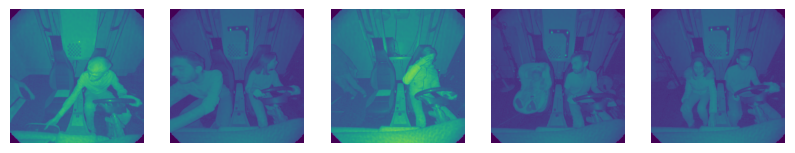

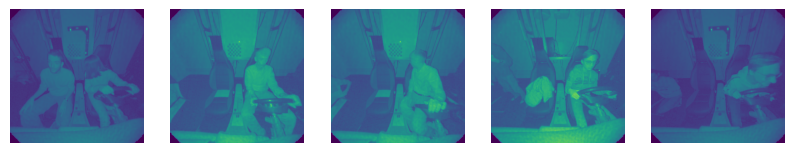

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Sample Display

def display_sample_images(images_dir, image_files, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i, image_file in enumerate(random.sample(image_files, num_samples)):
        img_path = os.path.join(images_dir, image_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display sample images from the train set
display_sample_images(os.path.join(main_dir, 'train/images'), train_images, num_samples=5)

# Display sample images from the validation set
display_sample_images(os.path.join(main_dir, 'valid/images'), valid_images, num_samples=5)

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 11.1 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO


#Load the model
model = YOLO('yolov8n.yaml')

#Use the model
results = model.train(data = os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/aarathy/google_colab_config.yaml '), epochs = 15)  #imgsz=640

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/MyDrive/aarathy/google_colab_config.yaml , epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /content/gdrive/.shortcut-targets-by-id/13bom3GYpKpOU04yjmEQ6TMnFviJgd8sb/aarathy/data2/train/labels... 1709 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1709/1709 [00:25<00:00, 66.64it/s] 


train: New cache created: /content/gdrive/.shortcut-targets-by-id/13bom3GYpKpOU04yjmEQ6TMnFviJgd8sb/aarathy/data2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/.shortcut-targets-by-id/13bom3GYpKpOU04yjmEQ6TMnFviJgd8sb/aarathy/data2/valid/labels... 366 images, 0 backgrounds, 0 corrupt: 100%|██████████| 366/366 [00:04<00:00, 84.70it/s] 


val: New cache created: /content/gdrive/.shortcut-targets-by-id/13bom3GYpKpOU04yjmEQ6TMnFviJgd8sb/aarathy/data2/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.86G       3.01      4.602      4.073         51        640: 100%|██████████| 107/107 [00:45<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        366        588   0.000781     0.0702    0.00923    0.00399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.63G      2.677      3.558      3.474         36        640: 100%|██████████| 107/107 [00:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]


                   all        366        588      0.691     0.0391     0.0672     0.0365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.64G       2.36      2.992      2.998         40        640: 100%|██████████| 107/107 [00:43<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]

                   all        366        588      0.497     0.0634      0.133     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.64G      1.969      2.476      2.605         34        640: 100%|██████████| 107/107 [00:43<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]

                   all        366        588      0.553      0.178       0.29      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.64G      1.664      2.098      2.292         45        640: 100%|██████████| 107/107 [00:43<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]


                   all        366        588      0.538      0.306      0.338      0.221
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.78G      1.157        1.7       1.89         17        640: 100%|██████████| 107/107 [00:42<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]

                   all        366        588      0.394      0.402      0.429      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.64G     0.9643      1.366      1.675         25        640: 100%|██████████| 107/107 [00:40<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        366        588      0.558      0.363      0.461      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.64G     0.8697      1.159      1.558         20        640: 100%|██████████| 107/107 [00:40<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        366        588       0.58      0.504      0.594      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.64G     0.7839      1.019       1.47         22        640: 100%|██████████| 107/107 [00:40<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]

                   all        366        588       0.62      0.493      0.603      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.64G     0.7195     0.9374      1.404         20        640: 100%|██████████| 107/107 [00:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]

                   all        366        588      0.636      0.522      0.633      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.64G     0.6919     0.8616      1.357         19        640: 100%|██████████| 107/107 [00:40<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.61it/s]


                   all        366        588      0.645      0.621      0.643      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.64G     0.6408     0.7899      1.312         21        640: 100%|██████████| 107/107 [00:40<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]

                   all        366        588      0.692      0.619      0.656      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.64G     0.6139     0.7483      1.287         21        640: 100%|██████████| 107/107 [00:40<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        366        588      0.745      0.607      0.682      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.64G     0.5779     0.7139      1.256         20        640: 100%|██████████| 107/107 [00:40<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        366        588      0.717      0.637      0.681      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.64G     0.5637      0.686      1.244         20        640: 100%|██████████| 107/107 [00:41<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]

                   all        366        588      0.821      0.631      0.684       0.56



15 epochs completed in 0.203 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008768 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]


                   all        366        588      0.808      0.631      0.678      0.559
             Accessory        366          7      0.935      0.714      0.833      0.549
              backpack        366         14          1      0.721      0.812      0.707
               Bhanket        366          1          0          0          0          0
                  book        366          5          1          0      0.403      0.184
                   Box        366         11      0.775      0.938       0.94      0.767
                Infant        366         16      0.976          1      0.995      0.872
                    FF        366         54      0.986          1      0.995      0.967
            background        366         12      0.855      0.583       0.59      0.506
            laptop bag        366          1          1          0          0          0
           Mobilephone        366          7          0          0          0          0
                perso

In [ ]:
# For Download
from google.colab import files
import shutil
import time

# Define the path to the directory you want to download
directory_path = "/content/runs"

# Compress the directory into a zip file
shutil.make_archive("runs", 'zip', directory_path)

# Introduce a delay to ensure the zip file is created
time.sleep(2)

# Download the zip file
files.download("runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>